<a href="https://colab.research.google.com/github/duchaba/Norwegian_Blue_Parrot_k2fa_AI/blob/master/Book_Time_Series_chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.0 Time Series Chapter 3

## 3.1 Set up

In [12]:
import pandas as pd
import numpy
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
#@title Setup Time Series Book (Tim)
#
# create class
class TSBOOK(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Oswald Compesato and Duc Haba"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    #
    # color pallete
    self.color_primary = "#ff7900"
    self.color_secondary = "#00c6d7"
    self.color_success = "#cf0072"
    self.color_warning = "#d9e506"
    self.color_base = "#830051"
    self.color_hold = "#766a65"
    self.color_gray80 = "#343a40"
    self.color_gray70 = "#495057"
    self.color_gray40 = "#ced4da"
    self.color_gray20 = "#e9ecef"
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  # 
  def _pw(self,a,b):
    if b:
      self._pp("status", a)
    return
  #
  def find_rmse(self,y,yhat):
    e = numpy.sqrt(numpy.mean(numpy.square(y-yhat)))
    return numpy.round(e, 4)
# ---end of D0HZ class
#
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator
#
tim3 = TSBOOK("Tim_Chapter_3")

---------------------------------------- : ----------------------------------------
                              Hello from : TSBOOK
                               Code name : Tim_Chapter_3
                               Author is : Oswald Compesato and Duc Haba
---------------------------------------- : ----------------------------------------


# 3.2 Check for missing date


In [61]:
# A dataframe from a dictionary of lists
data = {'Date': ['2021-01-18', '2021-01-20', '2021-01-23', '2021-01-25'],
        'Name': ['Jia', 'Tanya', 'Rohan', 'Sam']}
df = pd.DataFrame(data)
 
# Setting the Date values as index
df = df.set_index('Date')
 
# to_datetime() method converts string
# format to a DateTime object
df.index = pd.to_datetime(df.index)

In [62]:
df.head(10)

,Name
Date,
2021-01-18,Jia
2021-01-20,Tanya
2021-01-23,Rohan
2021-01-25,Sam


In [33]:
@add_method(TSBOOK)
def print_missing_date(self,df, start_date="2021-01-18",end_date="2021-01-25"):
  # dates which are not in the sequence
  self._ph()
  self._pp("Mising Date", "Range from "+start_date+" to "+end_date)
  x = pd.date_range(start=start_date, end=end_date).difference(df.index)
  for i in x.values:
    self._pp(">", i)
  self._ph()
  return x

In [34]:
# use the default start_date and end_date
x = tim3.print_missing_date(df)

---------------------------------------- : ----------------------------------------
                             Mising Date : Range from 2021-01-18 to 2021-01-25
                                       > : 2021-01-19T00:00:00.000000000
                                       > : 2021-01-21T00:00:00.000000000
                                       > : 2021-01-22T00:00:00.000000000
                                       > : 2021-01-24T00:00:00.000000000
---------------------------------------- : ----------------------------------------


In [79]:
@add_method(TSBOOK)
def augment_missing_date(self,df, start_date="2021-01-18",end_date="2021-01-25"):
  # dates which are not in the sequence
  x = pd.date_range(start=start_date, end=end_date).difference(df.index)
  df2 = df.copy()
  for i in x.values:
    df2.loc[i] = "missing"
  df2 = df2.sort_index()
  return df2

In [80]:
# use the default start_date and end_date
df_aug = tim3.augment_missing_date(df)
df_aug.head(10)

,Name
Date,
2021-01-18,Jia
2021-01-19,missing
2021-01-20,Tanya
2021-01-21,missing
2021-01-22,missing
2021-01-23,Rohan
2021-01-24,missing
2021-01-25,Sam


## 3.3 Visualize Time Series

In [92]:
# https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-stooq
!pip install pandas_datareader

In [82]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For time stamps
from datetime import datetime
# For get datasets
import pandas_datareader.data as web


In [107]:
# get Apple stocks multivariable dataset
apple = web.DataReader('AAPL', 'stooq')
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-05,27.280,27.501,27.253,27.445,92196955
2017-01-04,27.263,27.421,27.240,27.304,87202441
2017-01-03,27.250,27.378,26.998,27.334,117882492
2016-12-30,27.455,27.578,27.163,27.255,129977087
2016-12-29,27.405,27.561,27.393,27.475,62685025


In [101]:
apple.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-05,27.280,27.501,27.253,27.445,92196955
2017-01-04,27.263,27.421,27.240,27.304,87202441
2017-01-03,27.250,27.378,26.998,27.334,117882492
2016-12-30,27.455,27.578,27.163,27.255,129977087
2016-12-29,27.405,27.561,27.393,27.475,62685025


In [106]:
# get just the close value
apple_close = pd.DataFrame(apple['Close'])
apple_close.head()

,Close
Date,
2021-12-27,180.33
2021-12-23,176.28
2021-12-22,175.64
2021-12-21,172.99
2021-12-20,169.75


In [108]:
apple_close.tail()

,Close
Date,
2017-01-05,27.445
2017-01-04,27.304
2017-01-03,27.334
2016-12-30,27.255
2016-12-29,27.475


In [112]:
apple_daily_close = apple_close.sort_index(ascending=True)
apple_daily_close.head()  

,Close
Date,
2016-12-29,27.475
2016-12-30,27.255
2017-01-03,27.334
2017-01-04,27.304
2017-01-05,27.445


In [123]:
# draw/plot graph
import matplotlib
@add_method(TSBOOK)
def draw_graph(self,data, data2=None, title="Time Series Data",xlab="Time Series Index", ylab="Values"):
  matplotlib.pyplot.figure(figsize=(18,4))
  matplotlib.pyplot.title(title)
  matplotlib.pyplot.plot(data,color=self.color_primary)
  if (data2 is not None):
    matplotlib.pyplot.plot(data2,color=self.color_success)
  matplotlib.pyplot.xlabel(xlab)
  matplotlib.pyplot.ylabel(ylab)
  matplotlib.pyplot.grid()
  matplotlib.pyplot.show()
  return

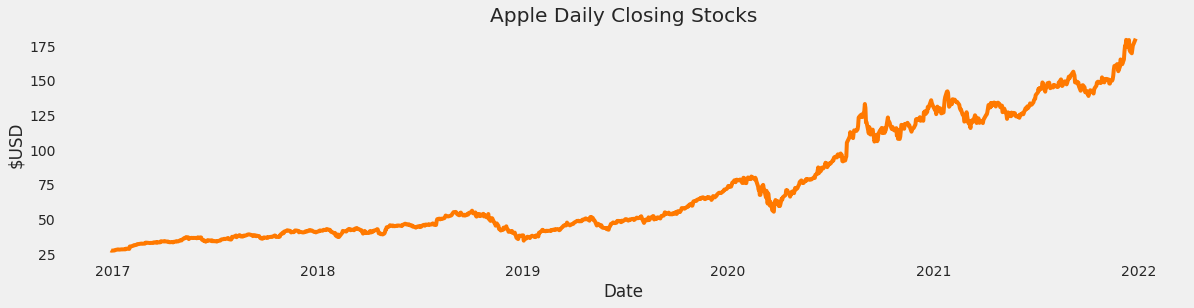

In [124]:
tim3.draw_graph(apple_daily_close,title="Apple Daily Closing Stocks",ylab="$USD",xlab="Date")

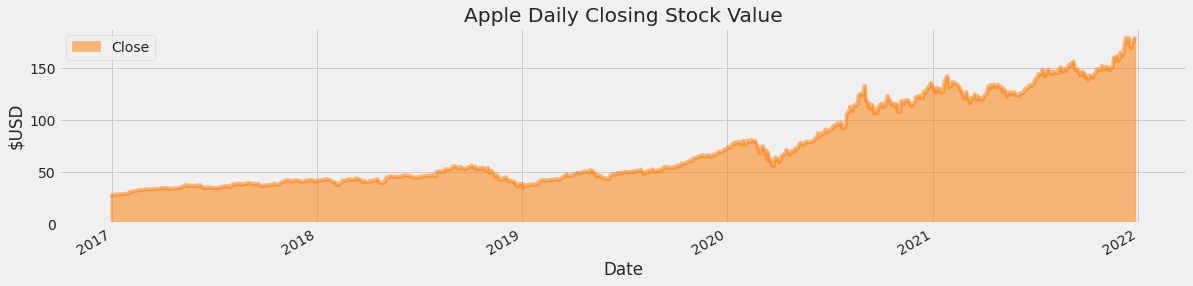

In [132]:
apple_daily_close.plot.area(figsize=(18,4),color=tim3.color_primary,title="Apple Daily Closing Stock Value",alpha=0.5,ylabel="$USD")